# Loan approval Prediction



### Info laadimine Kaggle'ist

In [3]:
import pandas as pd
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
print(df_train.shape)

(58645, 13)


Meil on 58645 rida infot mille peal treenida


In [6]:
df_train.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [7]:
print(df_test.shape)


(39098, 12)


Meil on 39098 rida infot mille peal testida läbi kaggle'i


In [9]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## Kontrollime infot

### Kas leidub null väärtuseid?

In [12]:
df_test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Null Väärtuseid ei leidu kummaski

### Käime üle kõik veerud, ja vaatame kas andmed on korreksed

#### **Vanus**

In [17]:
df_train["person_age"].describe()

count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64

**Train andmetes on isik kes on 123 aastat vana, eemaldame ta:**


In [19]:
df_train = df_train[df_train["person_age"] != 123]

In [20]:
df_train["person_age"].describe()

count    58644.000000
mean        27.549229
std          6.020378
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         84.000000
Name: person_age, dtype: float64

In [21]:
df_test["person_age"].describe()

count    39098.000000
mean        27.566781
std          6.032761
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

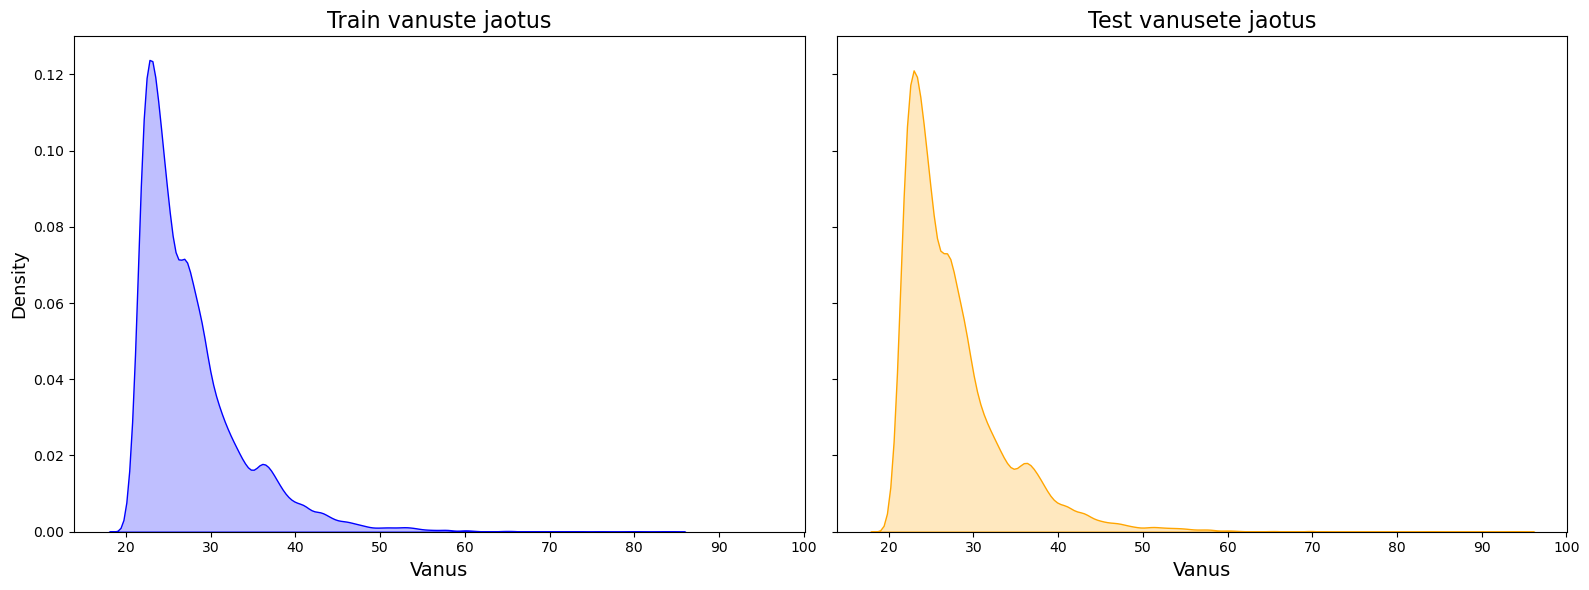

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#Et 2 oleks kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

#Train
sns.kdeplot(x=df_train["person_age"], color="blue", fill=True, ax=axes[0])
axes[0].set_title("Train vanuste jaotus", fontsize=16)
axes[0].set_xlabel("Vanus", fontsize=14)
axes[0].set_ylabel("Density", fontsize=13)

#Test
sns.kdeplot(x=df_test["person_age"], color="orange", fill=True, ax=axes[1])
axes[1].set_title("Test vanusete jaotus", fontsize=16)
axes[1].set_xlabel("Vanus", fontsize=14)

plt.tight_layout()
plt.show()

#### **Sissetulek**

In [24]:
#et tuleks loetavad numbrid
pd.options.display.float_format = '{:,.2f}'.format
print(df_train["person_income"].describe())

count      58,644.00
mean       64,046.65
std        37,931.25
min         4,200.00
25%        42,000.00
50%        58,000.00
75%        75,600.00
max     1,900,000.00
Name: person_income, dtype: float64


In [25]:
#et tuleks loetavad numbrid
pd.options.display.float_format = '{:,.2f}'.format
print(df_test["person_income"].describe())

count      39,098.00
mean       64,060.46
std        37,955.83
min         4,000.00
25%        42,000.00
50%        58,000.00
75%        75,885.00
max     1,900,000.00
Name: person_income, dtype: float64


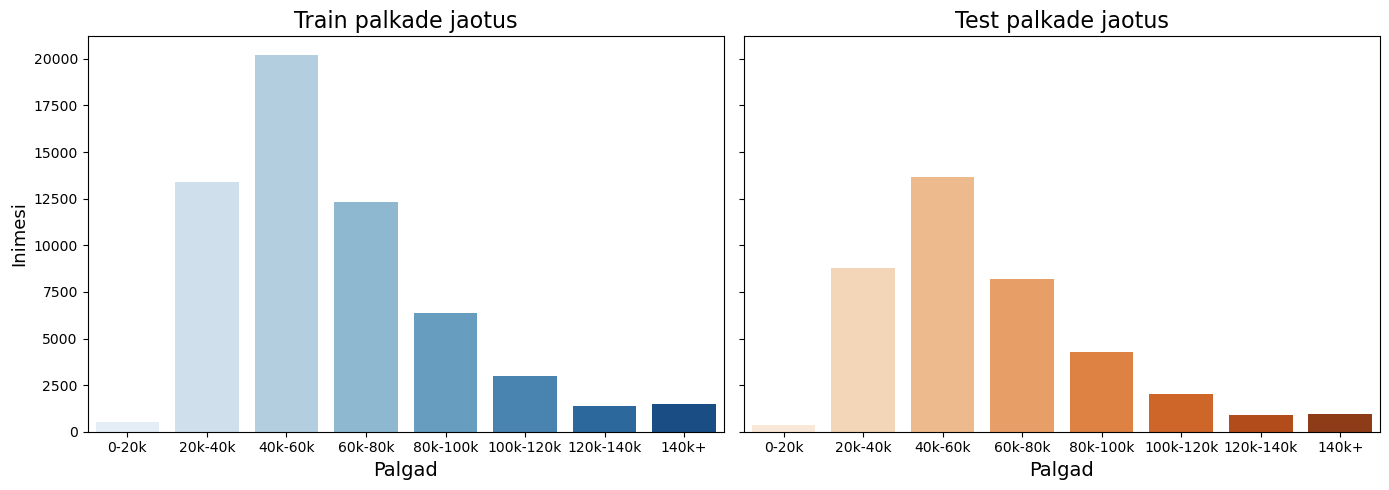

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#palga vahemikud
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 2000000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['salary_range_temp'] = pd.cut(df_train['person_income'], bins=bins, labels=labels, include_lowest=True)
df_test['salary_range_temp'] = pd.cut(df_test['person_income'], bins=bins, labels=labels, include_lowest=True)

# Et 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Train 
sns.countplot(x='salary_range_temp', data=df_train, ax=axes[0], palette='Blues', hue='salary_range_temp',  legend=False)
axes[0].set_title("Train palkade jaotus", fontsize=16)
axes[0].set_xlabel("Palgad", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='salary_range_temp', data=df_test, ax=axes[1], palette='Oranges', hue='salary_range_temp', legend=False)
axes[1].set_title("Test palkade jaotus", fontsize=16)
axes[1].set_xlabel("Palgad", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['salary_range_temp'], inplace=True)
df_test.drop(columns=['salary_range_temp'], inplace=True)

plt.tight_layout()
plt.show()

#### **Elukoha omamis liik**

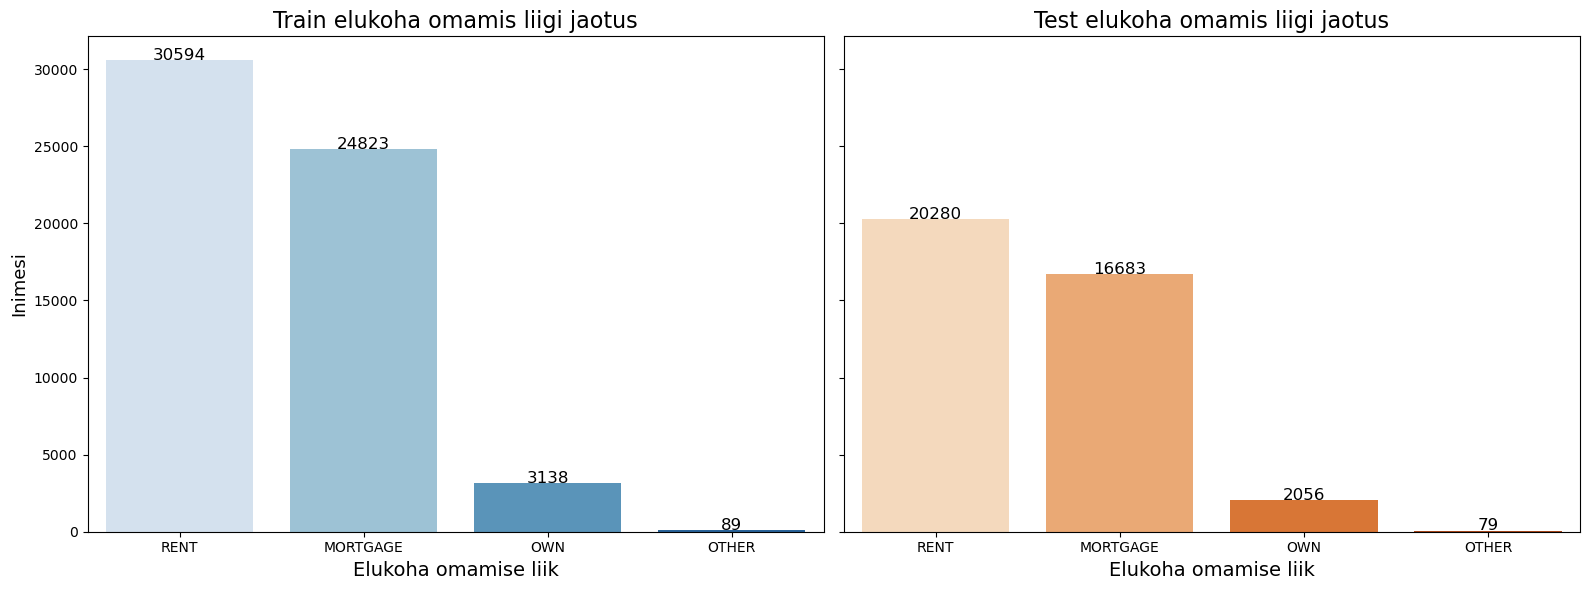

In [28]:
train_counts = df_train["person_home_ownership"].value_counts().reset_index()
test_counts = df_test["person_home_ownership"].value_counts().reset_index()
train_counts.columns = ["home_ownership", "count"]
test_counts.columns = ["home_ownership", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Train
train_plot = sns.barplot(x="home_ownership", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='home_ownership',  legend=False)
axes[0].set_title("Train elukoha omamis liigi jaotus", fontsize=16)
axes[0].set_xlabel("Elukoha omamise liik", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="home_ownership", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='home_ownership',  legend=False)
axes[1].set_title("Test elukoha omamis liigi jaotus", fontsize=16)
axes[1].set_xlabel("Elukoha omamise liik", fontsize=14)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Tööstaaž aastates**

In [30]:
df_train["person_emp_length"].describe()

count   58,644.00
mean         4.70
std          3.96
min          0.00
25%          2.00
50%          4.00
75%          7.00
max        123.00
Name: person_emp_length, dtype: float64

In [31]:
df_test["person_emp_length"].describe()

count   39,098.00
mean         4.69
std          3.87
min          0.00
25%          2.00
50%          4.00
75%          7.00
max         42.00
Name: person_emp_length, dtype: float64

**Kaks inimest olid käinud tööl 123 aastat, eemaldame nad:**

In [33]:
df_train = df_train[df_train["person_emp_length"] != 123]

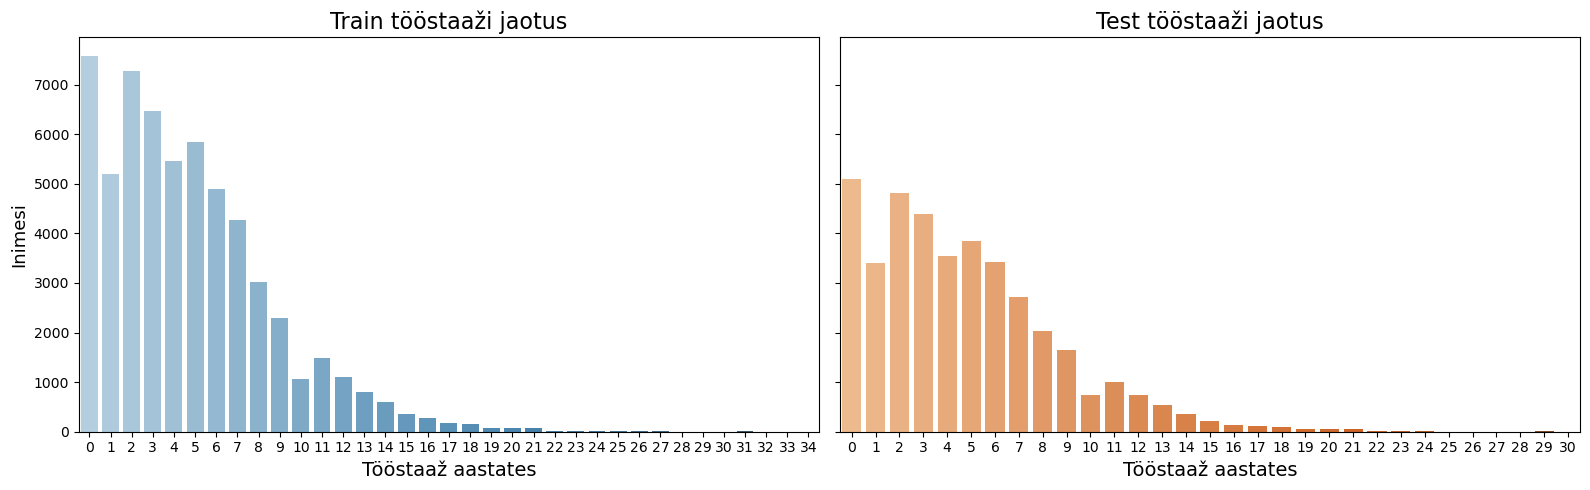

In [34]:
df_train['emp_length_count'] = df_train['person_emp_length'].map(df_train['person_emp_length'].value_counts())
df_test['emp_length_count'] = df_test['person_emp_length'].map(df_test['person_emp_length'].value_counts())

# et 2 oleks kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Train 
sns.barplot(x='person_emp_length', y='emp_length_count', data=df_train, ax=axes[0],hue='person_emp_length',  palette='Blues_d',  legend=False)
axes[0].set_title("Train tööstaaži jaotus", fontsize=16)
axes[0].set_xlabel("Tööstaaž aastates", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.barplot(x='person_emp_length', y='emp_length_count', data=df_test, ax=axes[1],hue='person_emp_length', palette='Oranges_d',  legend=False)
axes[1].set_title("Test tööstaaži jaotus", fontsize=16)
axes[1].set_xlabel("Tööstaaž aastates", fontsize=14)

# Eemaldab .0 arvude lõpust
for ax in axes:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels([f"{int(x)}" for x in ax.get_xticks()])


plt.tight_layout()
plt.show()

#### **Mille jaoks laenu kasutatakse?**

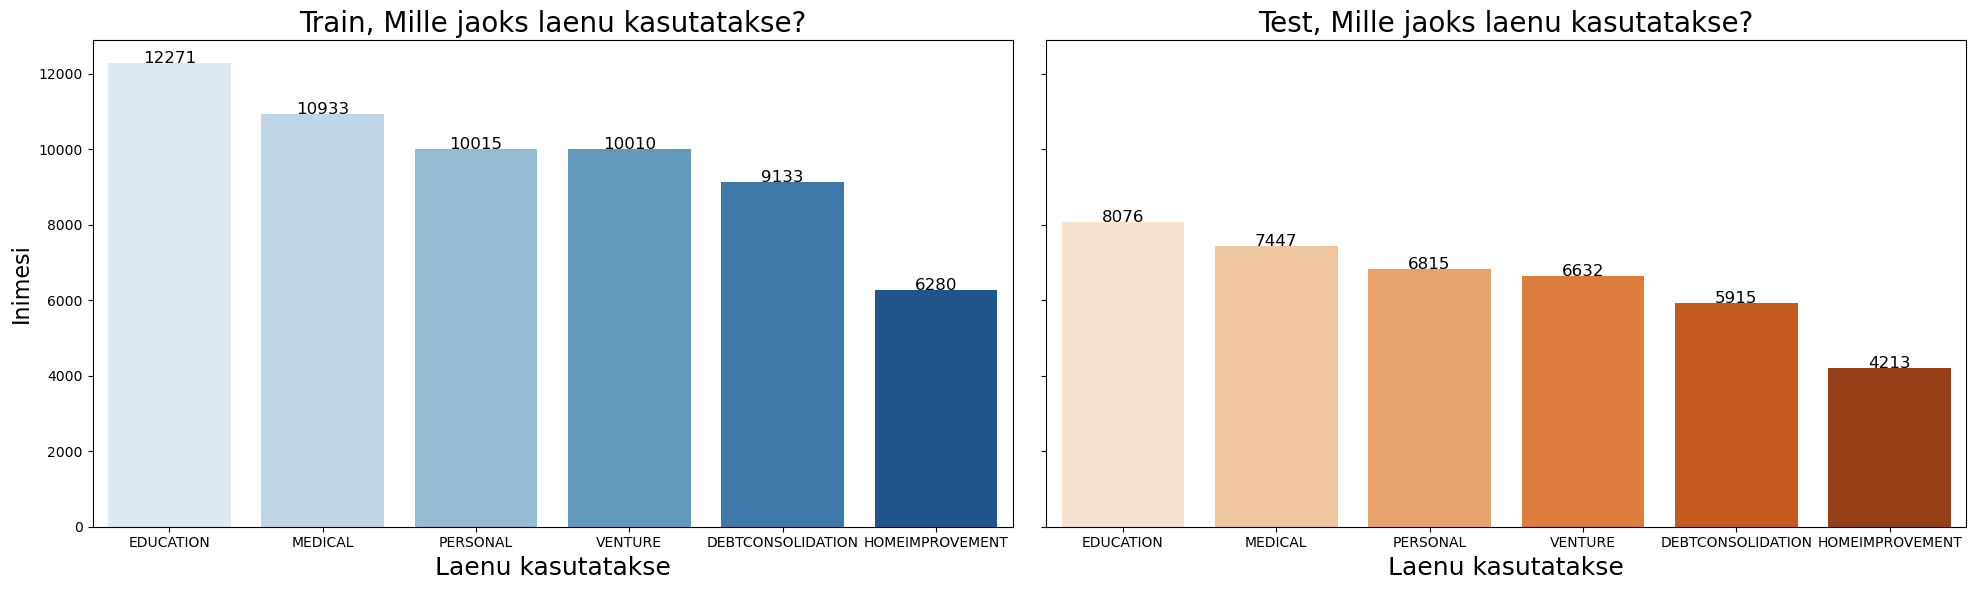

In [36]:
train_counts = df_train["loan_intent"].value_counts().reset_index()
test_counts = df_test["loan_intent"].value_counts().reset_index()
train_counts.columns = ["loan_intent", "count"]
test_counts.columns = ["loan_intent", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)



# Train
train_plot = sns.barplot(x="loan_intent", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='loan_intent',  legend=False)
axes[0].set_title("Train, Mille jaoks laenu kasutatakse?", fontsize=20)
axes[0].set_xlabel("Laenu kasutatakse", fontsize=18)
axes[0].set_ylabel("Inimesi", fontsize=16)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="loan_intent", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='loan_intent',  legend=False)
axes[1].set_title("Test, Mille jaoks laenu kasutatakse?", fontsize=20)
axes[1].set_xlabel("Laenu kasutatakse", fontsize=18)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Laenu kvaliteet**

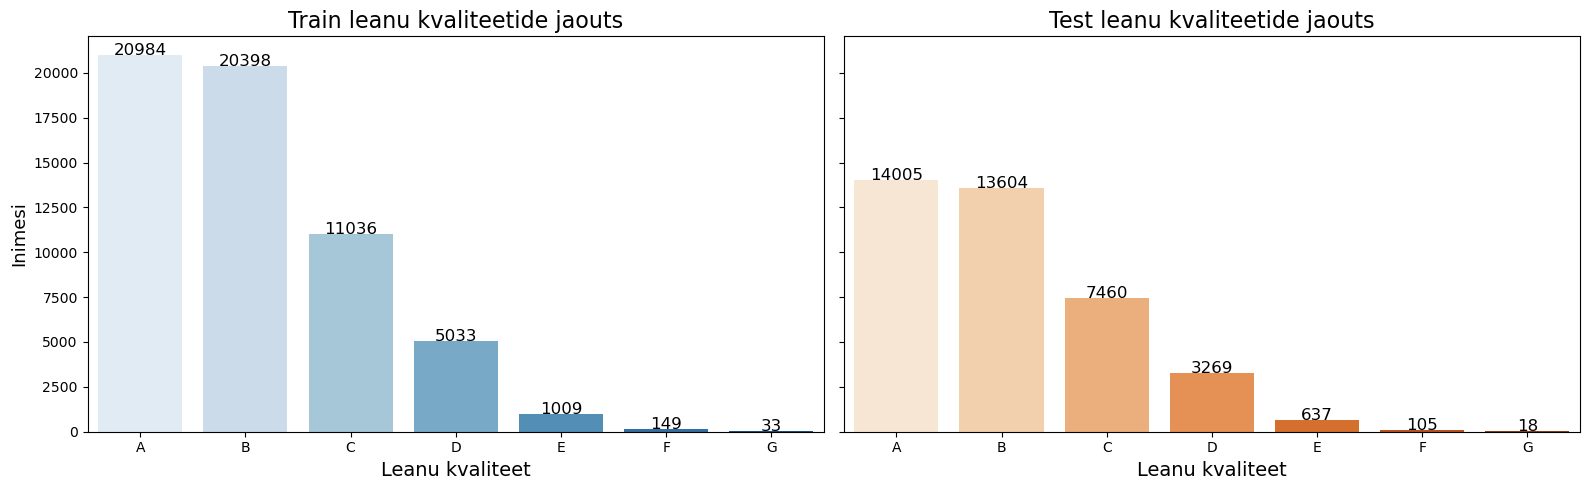

In [38]:
train_counts = df_train["loan_grade"].value_counts().reset_index()
test_counts = df_test["loan_grade"].value_counts().reset_index()
train_counts.columns = ["loan_grade", "count"]
test_counts.columns = ["loan_grade", "count"]

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)


# Train
train_plot = sns.barplot(x="loan_grade", y="count", data=train_counts, ax=axes[0], palette="Blues", hue='loan_grade',  legend=False)
axes[0].set_title("Train leanu kvaliteetide jaouts", fontsize=16)
axes[0].set_xlabel("Leanu kvaliteet", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

#Lisab numbrid Train andmetele
for bar, count in zip(train_plot.patches, train_counts["count"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)

# Test
test_plot = sns.barplot(x="loan_grade", y="count", data=test_counts, ax=axes[1], palette="Oranges",  hue='loan_grade',  legend=False)
axes[1].set_title("Test leanu kvaliteetide jaouts", fontsize=16)
axes[1].set_xlabel("Leanu kvaliteet", fontsize=14)

#Lisab numbrid Test andmetele
for bar, count in zip(test_plot.patches, test_counts["count"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(count), ha='center', fontsize=12)


plt.tight_layout()
plt.show()

#### **Soovitud laenu suurus**

In [40]:
df_train["loan_amnt"].describe()

count   58,642.00
mean     9,217.15
std      5,563.38
min        500.00
25%      5,000.00
50%      8,000.00
75%     12,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

In [41]:
df_test["loan_amnt"].describe()

count   39,098.00
mean     9,251.47
std      5,576.25
min        700.00
25%      5,000.00
50%      8,000.00
75%     12,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

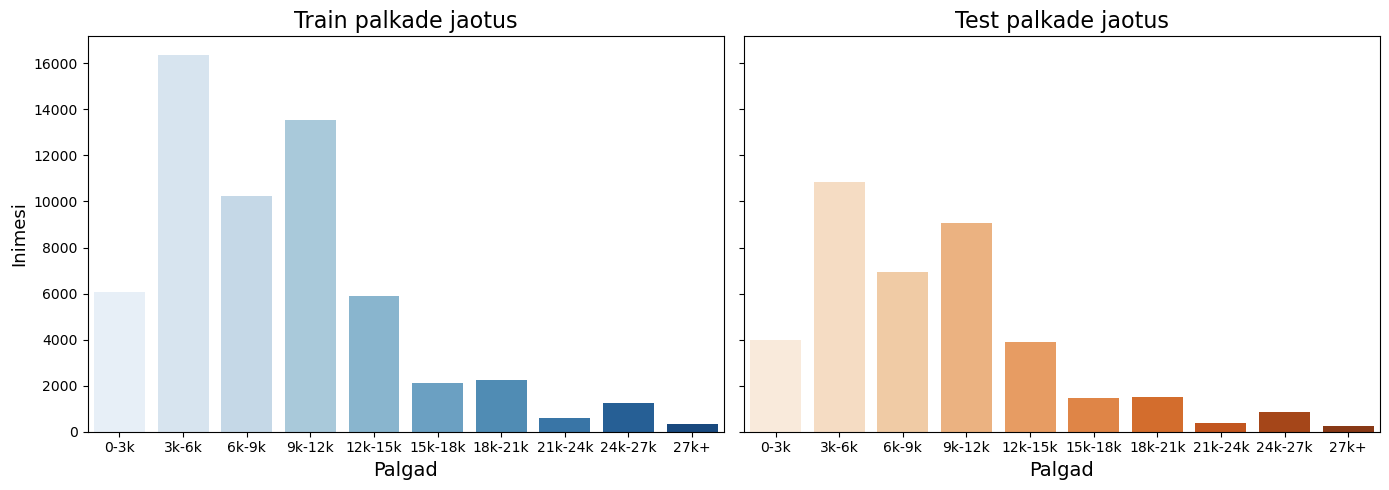

In [79]:
# Leanu summa vahemikud
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 36000]
labels = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k-18k', '18k-21k', '21k-24k', '24k-27k', '27k+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['loan_amnt_binned_temp'] = pd.cut(df_train['loan_amnt'], bins=bins, labels=labels, include_lowest=True)
df_test['loan_amnt_binned_temp'] = pd.cut(df_test['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Train 
sns.countplot(x='loan_amnt_binned_temp', data=df_train, ax=axes[0], palette='Blues', hue='loan_amnt_binned_temp', legend=False)
axes[0].set_title("Train palkade jaotus", fontsize=16)
axes[0].set_xlabel("Palgad", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='loan_amnt_binned_temp', data=df_test, ax=axes[1], palette='Oranges', hue='loan_amnt_binned_temp', legend=False)
axes[1].set_title("Test palkade jaotus", fontsize=16)
axes[1].set_xlabel("Palgad", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['loan_amnt_binned_temp'], inplace=True)
df_test.drop(columns=['loan_amnt_binned_temp'], inplace=True)

plt.tight_layout()
plt.show()

#### **Laenu intress %**

In [98]:
df_train["loan_int_rate"].describe()

count   58,642.00
mean        10.68
std          3.03
min          5.42
25%          7.88
50%         10.75
75%         12.99
max         23.22
Name: loan_int_rate, dtype: float64

In [84]:
df_test["loan_int_rate"].describe()

count   39,098.00
mean        10.66
std          3.02
min          5.42
25%          7.88
50%         10.75
75%         12.99
max         22.11
Name: loan_int_rate, dtype: float64

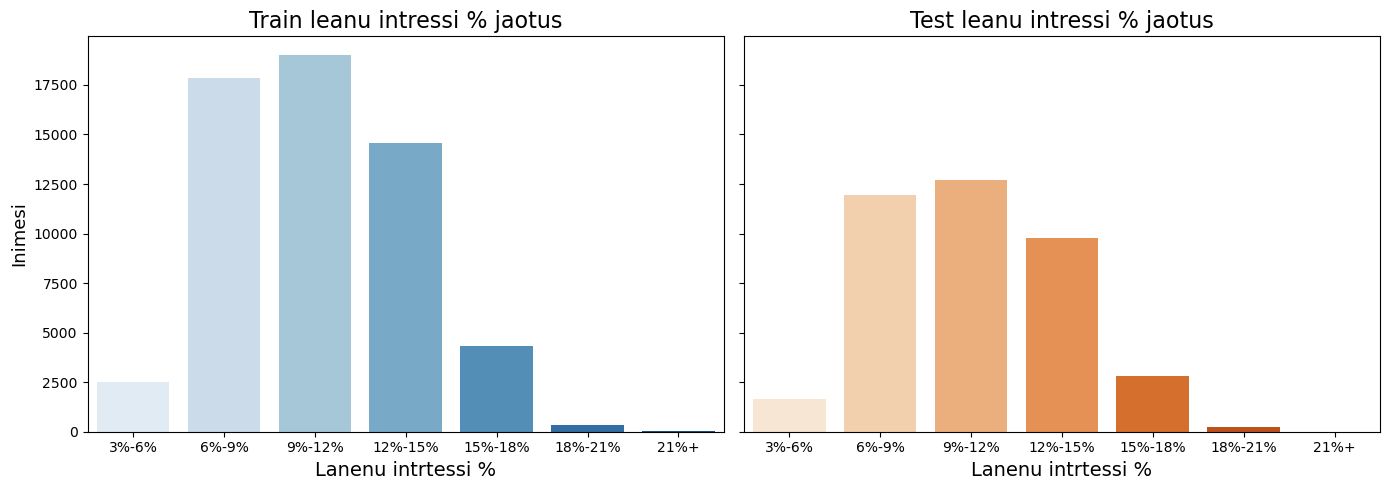

In [120]:
# Leanu intresside vahemikud
bins = [ 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]
labels = [ '3%-6%', '6%-9%', '9%-12%', '12%-15%', '15%-18%', '18%-21%', '21%+']

# ajutised tulbad, et mitte muuta algsed infot
df_train['loan_int_rate_binned_temp'] = pd.cut(df_train['loan_int_rate'], bins=bins, labels=labels, include_lowest=True)
df_test['loan_int_rate_binned_temp'] = pd.cut(df_test['loan_int_rate'], bins=bins, labels=labels, include_lowest=True)

# et oleks 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Train 
sns.countplot(x='loan_int_rate_binned_temp', data=df_train, ax=axes[0], palette='Blues', hue='loan_int_rate_binned_temp', legend=False,)
axes[0].set_title("Train leanu intressi % jaotus", fontsize=16)
axes[0].set_xlabel("Lanenu intrtessi %", fontsize=14)
axes[0].set_ylabel("Inimesi", fontsize=13)

# Test 
sns.countplot(x='loan_int_rate_binned_temp', data=df_test, ax=axes[1], palette='Oranges', hue='loan_int_rate_binned_temp', legend=False)
axes[1].set_title("Test leanu intressi % jaotus", fontsize=16)
axes[1].set_xlabel("Lanenu intrtessi %", fontsize=14)

# Kustutan ajutised tulbad
df_train.drop(columns=['loan_int_rate_binned_temp'], inplace=True)
df_test.drop(columns=['loan_int_rate_binned_temp'], inplace=True)

plt.tight_layout()
plt.show()